# Résolution de systèmes non-linéaires

En mécanique, les problèmes abordés sont très souvent **non-linéaires** : plasticité, rupture,...  On ne pourra pas les mettre sous la forme d'un problème inverse d'algèbre linéaire $\mathbf A\cdot \mathbf x = \mathbf b$. Les méthodes vues précédemment ne pourront pas être employées. La stratégie usuelle consiste alors à former le **résidu** $\mathbf r$ qui s'écrira par exemple dans le cadre d'un problème éléments finis :  
$$
\mathbf r(\mathbf U) = \mathbf F_{int}(\mathbf U) - \mathbf F_{ext}.
$$
On cherchera à annuler ce résidu. Pour ce faire, diverses méthodes **itératives** existent mais la plus commune reste de loin la **méthode de Newton**. 

## Méthode de Newton 

La **méthode de Newton** est absolument centrale en mécanique non-linéaire puisque c'est la méthode la plus utilisée pour résoudre les systèmes d'équations **non-linéaires** rencontrés. Malgré sa simplicité, elle permet une convergence rapide vers le zéro d'une fonction. Elle possède aussi certaines limitations qui ont poussé au développement de variantes.

### Cas 1D *

La méthode possède une interprétation graphique assez naturelle. On part d'un point $x_0$. La droite tangente à la courbe en $x_0$, $T_{x_0}$ s'exprime :
$$
T_{x_0}(x) = 
f(x_0) + f'(x_0)(x-x_0)
$$
Cette droite coupe l'axe des abscisses en un point $a$:
$$
T_{x_0}(a) = 0 = 
f(x_0) + f'(x_0)(a-x_0)
$$
Ce qui donne : 
$$
a = x_0 - \frac{f(x_0)}{f'(x_0)}
$$
Ce point $a$ est pris comme nouveau point de départ pour lequel on repète les opérations précédentes : $x_1 = a$. Finalement, le schéma s'écrit à l'itération $k + 1$ :
$$x_{k+1} = x_{k} - \frac{f(x_k)}{f'(x_{k+1})}.$$
On montrera que ce schéma converge rapidement vers $x^*$ tel que $f(x^*)=0$. En pratique, on stoppera la procédure quand $f(x_k)$ sera suffisamment proche de 0, typiquement entre $10^{-6}$ et $10^{-10}$.

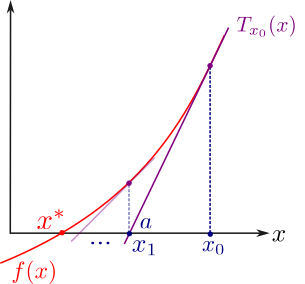

For iteration 1, x = 2.666666666666667 and f(x) = 1.7777777777777786
For iteration 2, x = 2.1333333333333337 and f(x) = 0.2844444444444454
For iteration 3, x = 2.007843137254902 and f(x) = 0.015747789311803206
For iteration 4, x = 2.0000305180437934 and f(x) = 6.10370189377818e-05
For iteration 5, x = 2.0000000004656613 and f(x) = 9.313225746154785e-10


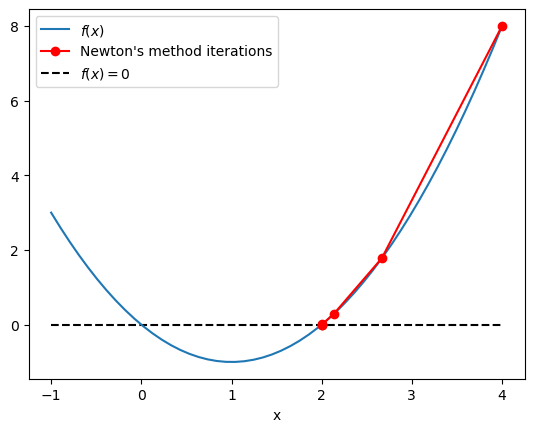

In [79]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x : (x-1)**2. - 1.
dfdx = lambda x : 2.*(x - 1.)

x_zero = 4.
eps = 1.0e-8
iteration = 0

x_zero_list = [x_zero]

while f(x_zero) > eps and iteration < 100:
    x_zero -= f(x_zero)/dfdx(x_zero)
    iteration += 1
    
    x_zero_list.append(x_zero)
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))


x_plot = np.linspace(-1., 4.)
x_zero_list = np.array(x_zero_list)

plt.plot(x_plot, f(x_plot), label="$f(x)$")
plt.plot(x_zero_list, f(x_zero_list), "ro-", label="Newton's method iterations")
plt.hlines(0., xmin=np.min(x_plot), xmax=np.max(x_plot), color="k", linestyles="dashed", label="$f(x)=0$")

plt.xlabel("x")
plt.legend()

L'exemple précédent était un cas particulièrement simple. En pratique, les fonctions à traiter sont généralement beaucoup plus complexes et leur comportement beaucoup moins doux. Dans ce cas, le méthode de Newton peut itérer longuement avant de converger comme dans l'exemple suivant. On notera que dans ce dernier, la dérivée est calculée **par perturbation**, ce qui veut dire qu'on l'approche numériquement en revant à sa définition, sans la calculer de façon explicite : 

$$
f'(x)
= \frac{f(x + dx) - f(x)}{ dx}
\approx
\frac{f(x + \Delta x) - f(x)}{ \Delta x}.
$$

Cette méthode est notamment pratique pour vérifier des dérivées analytiques. Évidemment la précision sur la dérivée est moins bonne qu'avec une formule analytique, néanmoins elle n'est pas forcément beaucoup plus coûteuse.


Pour des problèmes très rigiques, la méthode peut ne peut converger. En pratique, on peut favoriser la convergence en prenant un point initial $x_0$ proche de la solution $x^*$. Voyons maintenant comment cette méthode se généralise en dimension quelconque.

For iteration 1, x = -0.1772431759998554 and f(x) = -0.7835139318707558
For iteration 2, x = -0.4531698964451132 and f(x) = -0.582186650040404
For iteration 3, x = -0.6559649766532216 and f(x) = -0.3965532191896195
For iteration 4, x = -0.09106664336820103 and f(x) = -1.0058113106310693
For iteration 5, x = -0.7634776295561053 and f(x) = -0.27897246893756267
For iteration 6, x = -0.8627261914295519 and f(x) = -0.03730317575100078
For iteration 7, x = -0.8983042992425491 and f(x) = -0.02440118990021828
For iteration 8, x = -0.8075700590704266 and f(x) = -0.14952520095762062
For iteration 9, x = -0.8608468581460051 and f(x) = -0.03934418164981232
For iteration 10, x = -0.8958634736089969 and f(x) = -0.023838050246553805
For iteration 11, x = -0.7716960040894425 and f(x) = -0.25536659101536385
For iteration 12, x = -0.8589899660042672 and f(x) = -0.041499291317881284
For iteration 13, x = -0.893641504611027 and f(x) = -0.02349158185732589
For iteration 14, x = -0.6969949191195044 and f(x)

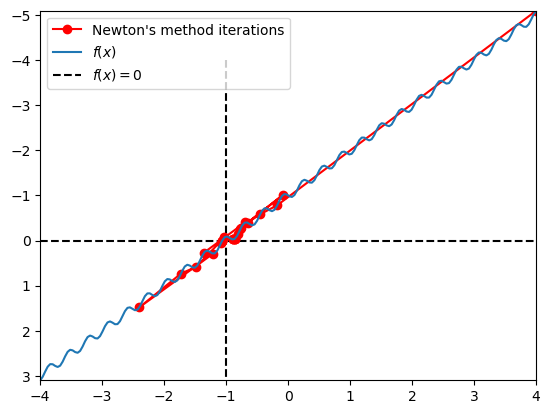

In [80]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x : (-x - 1) + 0.1*np.sin(20.*x)
dfdx = lambda x : (f(x + 1.0e-6) - f(x))/1.0e-6



x_zero = 4.
eps = 1.0e-8
iteration = 0

x_zero_list = [x_zero]

while abs(f(x_zero)) > eps and iteration < 100:
    x_zero -= f(x_zero)/dfdx(x_zero)
    iteration += 1
    
    x_zero_list.append(x_zero)
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))


x_plot = np.linspace(-4., 4., 200)
x_zero_list = np.array(x_zero_list)
plt.plot(x_zero_list, f(x_zero_list), "ro-", label="Newton's method iterations")
#x_plot = np.linspace(x_zero_list.min(), x_zero_list.max(), 200)
plt.plot(x_plot, f(x_plot), label="$f(x)$")

min_x = x_plot.min()
max_x = x_plot.max()

plt.xlim(min_x, max_x)
plt.ylim(f(min_x), f(max_x))

plt.hlines(0., xmin=np.min(x_plot), xmax=np.max(x_plot), color="k", linestyles="dashed", label="$f(x)=0$")
plt.vlines(-1., ymin=np.min(x_plot), ymax=np.max(x_plot), color="k", linestyles="dashed")

plt.legend()

### En dimension quelconque **

En pratiquen, la plupart des problèmes à traiter seront multidimensionnels. Heureusement, le schéma se généralise aisément en dimension $n$. On considère une fonction $f$ :
$$
f : 
\left\{
    \begin{array}{rcl}
            \mathbb R^n & \rightarrow & \mathbb R^n\\
        \mathbf x = (x_1,...,x_n) & \mapsto & f(\mathbf x) = (f_1(\mathbf x),...,f_n(\mathbf x))
    \end{array}
\right .
$$
Le schéma de Newton s'écrit alors pour l'itération $k+1$ : 
$$ 
\mathbf x_{k+1}
= 
\mathbf x_k - [\mathbf J_f(\mathbf x_k)]^{-1}
\cdot
f(\mathbf x)
$$
Cette expression fait alors intervenir la **matrice jacobienne** associée à $f$, $\mathbf J_f \in \mathbb R^{n\times n}$ correspondant à la matrice des dérivées, dont la composante $J_{f_{ij}}$ s'écrit
$$ 
J_{f_{ij}}(\mathbf x)
=
\frac{\partial f_i}{\partial x_j}(\mathbf x).
$$

Bien que la méthode converge rapidement vers la solution, elle nécessite de calculer la jacobienne, ce qui peut être parfois lourd, ainsi qu'une inversion de matrice en $O(n^3)$. Il s'agit d'une limitation inhérente à la méthode de Newton qui a poussé au développement de variantes.

In [122]:
from numpy.linalg import norm, inv

def f(x): 
    res = np.zeros(len(x))
    res[0] = x[0]**2. + 2.*x[0]*x[1]
    res[1] = 1 + x[0]*x[1]
    return res

def dfdx(x):
    res = np.zeros((x.size, x.size))
    res[0, 0] = 2.*x[0] + 2.*x[1]
    res[0, 1] = 2.*x[0]
    res[1, 0] = x[1]
    res[1, 1] = x[0]
    return res

x_zero = np.array([1., 1.])
eps = 1.0e-8
x_zero_list = [x_zero.tolist()]
iteration = 0

while norm(f(x_zero)) > eps and iteration < 100:
    inv_J = inv(dfdx(x_zero))
    x_zero -= inv_J.dot(f(x_zero))

    x_zero_list.append(x_zero.tolist())
    iteration += 1
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))
    

For iteration 1, x = [ 1.5 -1.5] and f(x) = [-2.25 -1.25]
For iteration 2, x = [ 1.41666667 -0.75      ] and f(x) = [-0.11805556 -0.0625    ]
For iteration 3, x = [ 1.41421569 -0.70717993] and f(x) = [-0.00020389 -0.00010495]
For iteration 4, x = [ 1.41421356 -0.70710678] and f(x) = [-3.06213721e-10 -1.55362168e-10]


### Méthodes quasi-Newton **

Le nom de méthodes **quasi-Newton** est un nom assez générique qui décrit les méthodes pour lesquels la matrice jacobienne n'est pas calculée exactement. 

Ainsi, une première approche consiste à calculer la jacobienne seulement toutes les $m$ itérations. On fait donc l'hypothèse (forte) que la dérivée varie peu entre $m$ itérations. Il faudra alors un nombre plus élevés d'itérations pour arriver à convergence mais elle seront en moyenne plus rapide, puisqu'on calculera la dérivée moins souvent.

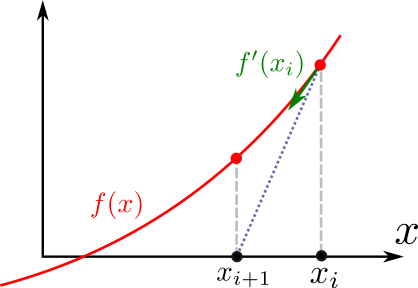

In [123]:
f = lambda x : (x-1)**2.
dfdx = lambda x, Delta_x : (f(x + Delta_x) - f(x))/Delta_x

x_zero = 4.
eps = 1.0e-8
iteration = 0
Delta_x = 1.0e-5
m = 3

x_zero_list = [x_zero]
deriv = dfdx(x_zero, Delta_x)

while f(x_zero) > eps and iteration < 100:
    if iteration%m:
        deriv = dfdx(x_zero, Delta_x)
    x_zero -= f(x_zero)/deriv
    iteration += 1
    
    x_zero_list.append(x_zero)
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))

For iteration 1, x = 2.500002499939254 and f(x) = 2.250007499824011
For iteration 2, x = 1.7500037499635837 and f(x) = 0.5625056249594377
For iteration 3, x = 1.3750043749694987 and f(x) = 0.14062828124626436
For iteration 4, x = 1.2812532812312907 and f(x) = 0.07910340820336749
For iteration 5, x = 1.1406291405721063 and f(x) = 0.019776555178049233
For iteration 6, x = 1.070317070197654 and f(x) = 0.004944490361181814
For iteration 7, x = 1.0527378026704615 and f(x) = 0.0027812758305085323
For iteration 8, x = 1.0263714010984004 and f(x) = 0.0006954507958927146
For iteration 9, x = 1.0131882000753782 and f(x) = 0.00017392862122820669
For iteration 10, x = 1.0098911501750107 and f(x) = 9.783485178461506e-05
For iteration 11, x = 1.0049480738244203 and f(x) = 2.4483434571913403e-05
For iteration 12, x = 1.0024765343885411 and f(x) = 6.133222577626732e-06
For iteration 13, x = 1.0018574014223265 and f(x) = 3.4499400436604603e-06
For iteration 14, x = 1.0009311939994048 and f(x) = 8.67122

### Méthode des sécantes ***

Une autre méthode courante consiste à estimer la dérivée à partir des itérés précédents via un calcul de pente. On peut écrire : 
$$
f'(x_{i}) 
=
\frac{df}{dx}(x_{i})
\approx
\frac{f(x_{i}) - f(x_{i-1})}{x_{i} - x_{i-1}}.
$$
Le schéma, nommé **méthode des sécantes**, s'écrit alors :
$$
x_{i+1} =
x_{i}
- \frac{x_{i} - x_{i-1}}{f(x_{i}) - f(x_{i-1})}
f(x_i)
$$
On a donc besoin de deux valeurs initiales distinctes $x_0$ et $x_1$. Comme la méthode par perturbation, la méthode des sécantes permet de proposer une schéma de Newton dans lequel la dérivée n'est pas calculée explicitement. 

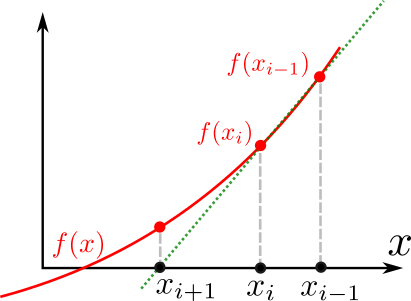

In [129]:
f = lambda x : (x-1)**2.
dfdx = lambda x_k, x_km1  : (f(x_k) - f(x_km1))/(x_k - x_km1)

x_zero = 4.
eps = 1.0e-8
iteration = 0
x_zero_list = [x_zero + eps, x_zero]

while f(x_zero) > eps and iteration < 100:
    x_old = x_zero_list[-2]
    x_zero -= f(x_zero)/dfdx(x_zero, x_old)
    iteration += 1
    
    x_zero_list.append(x_zero)
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))

For iteration 1, x = 2.5 and f(x) = 2.25
For iteration 2, x = 2.0 and f(x) = 1.0
For iteration 3, x = 1.6 and f(x) = 0.3600000000000001
For iteration 4, x = 1.375 and f(x) = 0.140625
For iteration 5, x = 1.2307692307692308 and f(x) = 0.053254437869822514
For iteration 6, x = 1.1428571428571428 and f(x) = 0.020408163265306103
For iteration 7, x = 1.088235294117647 and f(x) = 0.007785467128027666
For iteration 8, x = 1.0545454545454545 and f(x) = 0.002975206611570238
For iteration 9, x = 1.0337078651685392 and f(x) = 0.0011362201742204172
For iteration 10, x = 1.0208333333333333 and f(x) = 0.0004340277777777747
For iteration 11, x = 1.0128755364806867 and f(x) = 0.00016577943966549492
For iteration 12, x = 1.0079575596816976 and f(x) = 6.332275608777994e-05
For iteration 13, x = 1.0049180327868852 and f(x) = 2.4187046492877657e-05
For iteration 14, x = 1.0030395136778116 and f(x) = 9.238643397604005e-06
For iteration 15, x = 1.0018785222291797 and f(x) = 3.528845765522361e-06
For iterati

### Méthode de Broyden et BFGS ***

La méthode des sécantes possèdent des généralisations en dimension $n$ très intéressantes. De façon similaire, on approche la jacobienne par une matrice $\mathbf B_k$ telle que : 
$$
\mathbf B_k\cdot (\mathbf x_k - \mathbf x_{k-1}) = F(\mathbf x_{k}) - F(\mathbf x_{k-1}).
$$
La méthode de Broyden propose ensuite le schéma récurrent suivant pour calculer $\mathbf B_{k+1}$ : 
$$
\mathbf B_{k+1}
=
\mathbf B_k
+ 
\frac{\Delta \mathbf y_n - \mathbf B_n \cdot\Delta \mathbf x_n}{\|\Delta \mathbf x_n\|^2}\Delta \mathbf x_n^T
$$
avec $\Delta \mathbf x_n = \mathbf x_n - \mathbf x_{n-1}$ et $\Delta \mathbf y_n = \mathbf y_n - \mathbf y_{n-1}$. On constate que le schéma ne fait intervenir que des produits matrice-vecteur et vecteur-vecteur. Néanmoins, il nécessite encore une étape coûteuse d'inversion.

In [159]:
import numpy.linalg as la

def f(x): 
    res = np.zeros(len(x))
    res[0] = x[0]**2. + 2.*x[0]*x[1]
    res[1] = 1 + x[0]*x[1]
    return res

def dfdx(x):
    res = np.zeros((x.size, x.size))
    res[0, 0] = 2.*x[0] + 2.*x[1]
    res[0, 1] = 2.*x[0]
    res[1, 0] = x[1]
    res[1, 1] = x[0]
    return res

x_zero = np.array([1., 1.])
eps = 1.0e-6
x_zero_list = [x_zero.tolist()]
iteration = 0

B_k = dfdx(x_zero)

while norm(f(x_zero)) > eps and iteration < 100:
    
    delta_xn = la.solve(B_k, -f(x_zero))
    
    x_np1 = x_zero + delta_xn
    delta_yn = f(x_np1) - f(x_zero)
    
    B_k += np.outer(delta_yn - B_k.dot(delta_xn), delta_xn)/norm(delta_xn)**2.
    
    x_zero = x_np1

    x_zero_list.append(x_zero.tolist())
    iteration += 1 
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))
    

For iteration 1, x = [ 1.5 -1.5] and f(x) = [-2.25 -1.25]
For iteration 2, x = [ 1.41875 -0.60625] and f(x) = [0.29261719 0.13988281]
For iteration 3, x = [ 1.40912388 -0.68651787] and f(x) = [0.05085266 0.03261128]
For iteration 4, x = [ 1.4176655  -0.71873275] and f(x) = [-0.02806977 -0.01892263]
For iteration 5, x = [ 1.4141134  -0.70674163] and f(x) = [0.00089109 0.00058719]
For iteration 6, x = [ 1.41421146 -0.70709923] and f(x) = [1.84007041e-05 1.21665862e-05]
For iteration 7, x = [ 1.41421357 -0.7071068 ] and f(x) = [-5.58373090e-08 -3.73308984e-08]


Pour améliorer la méthode précédente, une piste peut donc consister à contourner la coûteuse étape d'inversion. C'est ce que fait la méthode de Broyden-Fletcher-Goldfarb-Shanno, couramment appellée **BFGS** qui est particulièrement utilisée. L'idée est de prendre la matrice $\mathbf H_k$ qui n'approche pas la jacobienne, comme précédemment, mais directement son inverse : 
$$
\mathbf H_k 
\approx
\mathbf J_f(\mathbf x_k)^{-1}.
$$
Le schéma est globalement similaire au précédent mais sans étape d'inversion. On a alors la formule de récurrence : 
$$
\mathbf H_{k+1}
=
\mathbf H_k
+
\frac{\Delta \mathbf x_n^T\cdot \Delta\mathbf y_n + \Delta \mathbf y_n^T\cdot \mathbf H_k \cdot \mathbf \Delta \mathbf y_n}{(\Delta \mathbf x_n^T\cdot \Delta \mathbf y_n)^2}(\Delta \mathbf x_n \cdot \Delta \mathbf x_n^T)
- 
\frac{\mathbf H_k\cdot \Delta \mathbf y_n\cdot \Delta \mathbf x_n^T + \Delta \mathbf x_n \cdot \mathbf y_n^T\cdot \mathbf H_k }{\Delta \mathbf x_n^T\cdot \Delta \mathbf y_n}
$$
On aboutit alors à une méthode ne présentant que des produits matrice-vecteur donc de compléxité $O(n^2)$ à chaque itération, ce qui explique sa popularité.

In [182]:
import numpy.linalg as la

def f(x): 
    res = np.zeros(len(x))
    res[0] = x[0]**2. + 2.*x[0]*x[1]
    res[1] = 1 + x[0]*x[1]
    return res

def dfdx(x):
    res = np.zeros((x.size, x.size))
    res[0, 0] = 2.*x[0] + 2.*x[1]
    res[0, 1] = 2.*x[0]
    res[1, 0] = x[1]
    res[1, 1] = x[0]
    return res

x_zero = np.array([1., 1.])
eps = 1.0e-8
x_zero_list = [x_zero.tolist()]
iteration = 0

H_k = la.inv(dfdx(x_zero))

while norm(f(x_zero)) > eps and iteration < 100:
    
    delta_xn = -H_k.dot(f(x_zero))
    
    x_np1 = x_zero + delta_xn
    delta_yn = f(x_np1) - f(x_zero)
    
    t_1 = (delta_xn.dot(delta_yn) + delta_yn.dot(H_k.dot(delta_yn)))*np.outer(delta_xn, delta_xn)/(delta_xn.dot(delta_yn))**2.
    t_2 = (np.outer(H_k.dot(delta_yn), delta_xn) + np.outer(delta_xn, delta_yn).dot(H_k))/delta_xn.dot(delta_yn)
    
    H_k = H_k + t_1 -t_2   
    x_zero = x_np1

    x_zero_list.append(x_zero.tolist())
    iteration += 1 
    print("For iteration " + str(iteration) + ", " + "x = " + str(x_zero) + " and f(x) = " + str(f(x_zero)))
    

For iteration 1, x = [ 1.5 -1.5] and f(x) = [-2.25 -1.25]
For iteration 2, x = [ 1.45919421 -0.81869835] and f(x) = [-0.26003203 -0.19463989]
For iteration 3, x = [ 1.38058071 -0.554868  ] and f(x) = [0.37392298 0.23395994]
For iteration 4, x = [ 1.40577445 -0.66756528] and f(x) = [0.09930938 0.06155378]
For iteration 5, x = [ 1.41395118 -0.70631336] and f(x) = [0.00187271 0.00130739]
For iteration 6, x = [ 1.4142856  -0.70744093] and f(x) = [-0.00084327 -0.00052352]
For iteration 7, x = [ 1.41423283 -0.70719426] and f(x) = [-0.00022018 -0.00013733]
For iteration 8, x = [ 1.41421314 -0.70710487] and f(x) = [4.81633072e-06 3.00467522e-06]
For iteration 9, x = [ 1.41421356 -0.70710678] and f(x) = [-3.13651904e-09 -1.96031213e-09]


### Convergence quadratique ***

Compte-tenu de l'importance de la méthode de Newton, il semble important de justifier ici que la suite $(x_k)_k$ tend vers $x^*$. De plus, on peut montrer que cette convergence est rapide, **quadratique** en l'occurence, lorsqu'on débute suffisamment proche de $x^*$ et si $f$ a de bonnes propriétés. Dans ce cas, à chaque itération, on double l'ordre de précision sur l'approximation de $x^*$. Cette propriété explique en partie la popularité de la méthode de Newton.
<br>  
On propose ici une démonstration qui, à défaut d'être parfaitement rigoureuse d'un point de vue mathématique permet d'illustrer la démarche et de retrouver le résultat attendu. On supposera $f$ de classe $\mathcal C^2$ et que $f$ s'annule une fois en $x^*$ sur $I\in\mathcal D_f$, intervalle de l'étude.  
On étudie l'écart entre $x_{n+1}$ et $x^*$ qu'on cherche à majorer :
\begin{align}
x_{n+1} - x^* &= x_n - \frac{f(x_n)}{f'(x_n)} - x^*\\
 \\
&= 
\frac{-f(x_n) - f'(x_n)(x^* - x_n)}{f'(x_n)}
\end{align}
On reconnaît au numérateur le début d'un développement de Taylor en $x^*$ :
$$
f(x^*)
=
0
=
f(x_n)
+ f'(x_n)(x^* - x_n) + R(x_n)
$$
où $R(x)$ est le reste à l'ordre 1.  
On a donc :
$$
x_{n+1} - x^*
=
\frac{R(x_n)}{f'(x_n)}
$$
Le reste $R$ s'exprime d'après la formule de Taylor-Lagrange : 
$$
R(x_n) = \frac{1}{2} f''(\xi)(x^* - x_n)^2 
$$
où $\xi \in [x_n , x^*]$.  
Donc,
$$
|x_{n+1} - x^*|
=
\frac{1}{2}
\frac{|f''(\xi)|}{|f'(x_n)|}(x^* - x_n)^2
$$
La fonction $f$ étant de classe $\mathcal C^2$, les fonctions $f'$ et $f''$ sont continues et atteignent leurs bornes sur l'intervalle considéré. On peut alors majorer $|x_{n+1} - x^*|$ :
$$
|x_{n+1} - x^*| \le
\frac{\max_I |f''|}{2 \min_I |f'|}
|x^* - x_n|^2
= 
C|x_n- x^*|^2
$$
avec $C = \displaystyle\frac{\max_I |f''|}{2 \min_I |f'|}$.  
On considère $C|x_{n+1} - x^*|$ qu'on peut majorer par récurrence:
$$
C|x_{n+1} - x^*| \le [C|x_n - x^*|]^2 
\le [C|x_{n-1} - x^*|]^{2^2} 
\le
...
\le [C|x_{0} - x^*|]^{2^{n+1}}
$$
La suite majorante $[C|x_{0} - x^*|]^{2^{n+1}}$ converge vers 0 si :
$$
C|x_{0} - x^*| < 1.
$$
À cette condition, on a $x_n$ tend vers $x^*$ de façon quadratique. Il est intéressant de noter que la convergence dépend à la fois du point initial et de la régularité de la fonction, ce qu'on pouvait pressentir.

## Quelques mots sur l'optimisation **

Nous avons vu la méthode de Newton dans le cadre d'une recherche de zéro. Elle est aussi très employée dans les problèmes d'**optimisation**, mis généralement sous la forme d'un problème de **minimisation**. Le passage de l'un à l'autre est immédiat si on remarque que la dérivée s'annule là où le minimum est atteint. Typiquement, pour une fonction $f$ convexe, on a $x^*$ tel que :
$$
[x^*
=
\arg\min_{x} f(x)]
\Leftrightarrow
[ f'(x^*) = 0].
$$
Dans un problème d'optimisation, on pourra alors appliquer la méthode de Newton à $f'$ pour obtenir le schéma suivant convergeant vers $x^*$ : 
$$
x_{k+1} =
x_k
- 
\frac{f'(x_k)}{f''(x_k)}.
$$
Le schéma se généralise à nouveau en $n$ dimensions :
$$
\mathbf x_{k+1}
= 
\mathbf x_k
- 
\mathbf H(x_k)^{-1}\cdot \nabla  
f(\mathbf x_k)
$$
où $\mathbf H$ est la matrice des dérivées secondes, nommée **matrice hessienne**. Les méthodes quasi-Newton abordées se généralisent aussi au cas d'un problème d'optimisation, notamment la méthode BFGS qui est très couramment utilisée. Enfin, le schéma précédent est à rapprocher de l'algorithme de **descente de gradient** qui très commun : 
$$
\mathbf x_{k+1}
= 
\mathbf x_k
- 
\alpha_k \nabla  
f(\mathbf x_k)
$$
avec $\alpha_k$ le taux d'apprentissage.

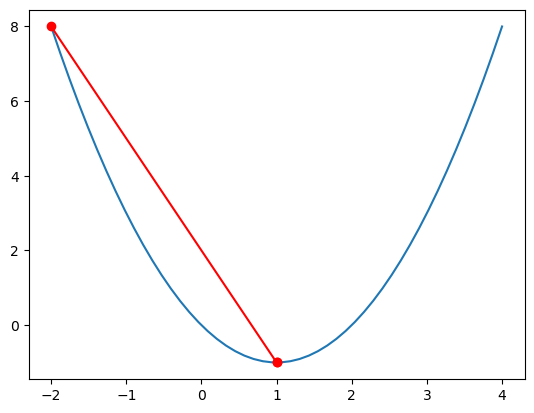

In [183]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt

f = lambda x : (x-1)**2. - 1.
dfdx = lambda x : 2.*(x - 1.)
d2fdx2 = lambda x : 2.

eps = 1.0e5
tol = 1.0e-5

x_old = -2.
iteration = 0
x_list = [x_old]

while eps > tol and iteration < 100:
    x_new = x_old - dfdx(x_old)/d2fdx2(x_old)
    eps = la.norm(x_new - x_old)
    x_old = x_new
    iteration += 1
    x_list.append(x_old)

x = np.linspace(-2, 4)
plt.plot(x, f(x))

x_list = np.array(x_list)
plt.plot(x_list, f(x_list), "ro-")

## Conclusion

Compte-tenu de la nature des problèmes de mécanique, il est nécessaire d'employer des méthodes qui permettent de résoudre des systèmes d'équations non-linéaires. Pour ce faire, on formera généralement le résidu qu'on cherchera à annuler. La méthode de Newton est alors la plus employée. Elle permet une convergence rapide (quadratique) vers le zéro. Néanmoins, elle induit le calcul d'une matrice jacobienne et son inversion, qui peuvent être très coûteux. Des méthodes alternatives basées sur le schéma de Newton,  allègeant ce coût, peuvent alors être employées. Enfin, la méthode de Newton est aussi particulièrement utilisée en optimisation et à rapprocher des algorithmes de descente de gradient.